In [2]:
sys.path.insert(0,'../python')

In [3]:
import cool_tigress as ct

r = ct.RecRate()

Tmin = 10.0
Tmax = 10.0**5.1
Z = 1.0
xi_CR = 1e-16
G_PE = 1.
G_CI = 1.
G_CO = 1.
G_H2 = 1.

T = np.logspace(np.log10(Tmin), np.log10(Tmax), num=200)
c1 = ct.CoolTigress(T=T, Z=Z, xi_CR=xi_CR,
                    G_PE=G_PE, G_CI=G_CI, G_CO=G_CO, G_H2=G_H2, equil=True, fast_flag=False)
c2 = ct.CoolTigress(T=T, Z=Z, xi_CR=xi_CR,
                    G_PE=G_PE, G_CI=G_CI, G_CO=G_CO, G_H2=G_H2, equil=True, fast_flag=True)

/home/jgkim/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2048: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [4]:
r.get_rec_rate_grain(1.0, 1.0, 1e4, 1)

9.33442848116032e-14

Text(0, 0.5, 'n_H')

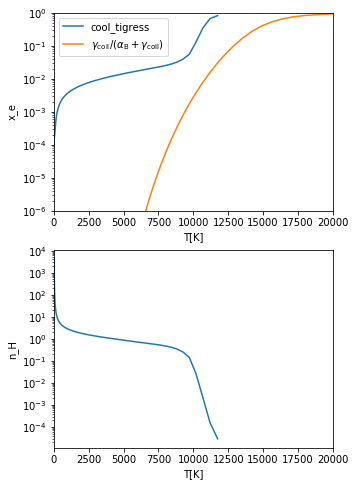

In [9]:
lnTe = np.log(T*8.6173e-5)

I_H = (13.6*au.eV/ac.k_B).to('K').value
gamma1 = 5.466e-9*1.07*(T/1e4)**0.5*np.exp(-I_H/T)
gamma2 = np.exp(-3.271396786e1 + (1.35365560e1 + (- 5.73932875 + (1.56315498 + (- 2.877056e-1 +\
             (3.48255977e-2 + (- 2.63197617e-3 + (1.11954395e-4 + (-2.03914985e-6)\
              *lnTe)*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)
alphaB = 2.59e-13*(T/1e4)**-0.7
xe_eq1 = gamma1/(alphaB + gamma1)
xe_eq2 = gamma2/(alphaB + gamma2)

fig, axes = plt.subplots(2, 1, figsize=(5, 8))
plt.sca(axes[0])
plt.semilogy(c1.T, c1.x_e, label='cool_tigress')
#plt.semilogy(T, xe_eq1, label='')
plt.semilogy(T, xe_eq2, label=r'$\gamma_{\rm coll}/(\alpha_{\rm B} + \gamma_{\rm coll})$')
plt.xlabel('T[K]')
plt.ylabel('x_e')
plt.xlim(0,20000)
plt.ylim(1e-6,1.0)
plt.legend()

plt.sca(axes[1])
plt.semilogy(c1.T, c1.nH, label='cool_tigress')
plt.xlim(0,20000)
plt.xlabel('T[K]')
plt.ylabel('n_H')

(1e-06, 1.0)

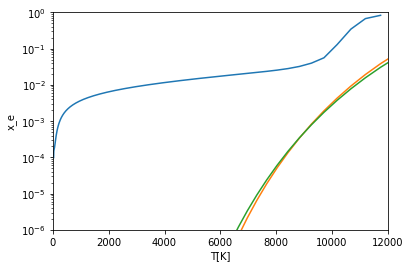

In [6]:
lnTe = np.log(T*8.6173e-5)

I_H = (13.6*au.eV/ac.k_B).to('K').value
gamma1 = 5.466e-9*1.07*(T/1e4)**0.5*np.exp(-I_H/T)
gamma2 = np.exp(-3.271396786e1 + (1.35365560e1 + (- 5.73932875 + (1.56315498 + (- 2.877056e-1 +\
             (3.48255977e-2 + (- 2.63197617e-3 + (1.11954395e-4 + (-2.03914985e-6)\
              *lnTe)*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)*lnTe)
alphaB = 2.59e-13*(T/1e4)**-0.7
xe_eq1 = gamma1/(alphaB + gamma1)
xe_eq2 = gamma2/(alphaB + gamma2)

plt.semilogy(c1.T, c1.x_e)
plt.semilogy(T, xe_eq1)
plt.semilogy(T, xe_eq2)
plt.xlabel('T[K]')
plt.ylabel('x_e')
plt.xlim(0,12000)
plt.ylim(1e-6,1.0)

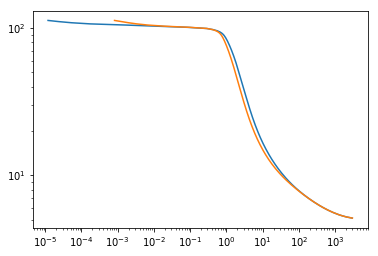

In [22]:
ne1 = c1.x_e*c1.nH
ne2 = c2.x_e*c2.nH
psi1 = ne1*c1.T**0.5/ne1
psi2 = ne2*c2.T**0.5/ne2
plt.loglog(c1.nH, psi1)
plt.loglog(c2.nH, psi2)
#plt.loglog(c1.T, r.get_rec_rate_grain(ne, G0, c1.T, 1))

In [23]:
5000**0.5/(1.0*0.1)

707.1067811865476

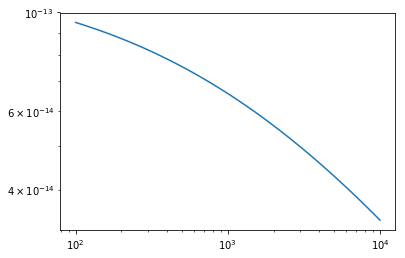

In [5]:
Z = 1
nH = 1e2
ne = 1e-1
G0 = 1.0
T = np.logspace(2, 4)
alpha_gr = r.get_rec_rate_grain(ne, G0, T, Z)
alpha_gr = r.get_alpha_gr(T, psi, Zne)
plt.loglog(T, alpha_gr)

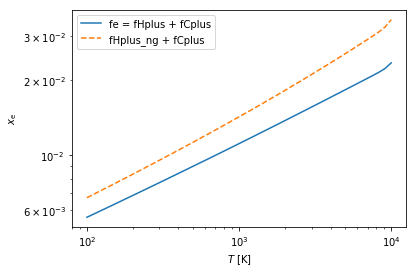

In [20]:
import cool_tigress as ct

xCtot = 1.6e-4

#nH = 20.0
nH = 1.0
xH2 = 0.0
xi_CR = 2e-16
T = np.logspace(2, 4)
Zg = Zd = 1.0
G_CI = G_PE = 1.0
xCII = xCtot
xe = xCII
#plt.loglog(T, ct.fHplus(xe, xCII, xH2, nH, T, Zd, xi_CR, G_PE))
plt.loglog(T, ct.fe(xH2, nH, T, Zd, Zg, xi_CR, G_PE, G_CI), label='fe = fHplus + fCplus')
plt.loglog(T, xCII + ct.fHplus_ng(xH2, nH, T, Zd, xi_CR, G_PE), '--', label='fHplus_ng + fCplus')
plt.xlabel(r'$T$ [K]')
plt.ylabel(r'$x_{\rm e}$')
plt.legend()